# M2 | Exploration Notebook

In this notebook, you will do a first exploration of the data set that you will use for your project. One part of this exploration is guided, i.e. we will ask you to solve specific questions (task 1-3). The other part is open, i.e. we will ask you to come up with your own exploration ideas (task 4). 

Please upload your solved notebook to Moodle (under Milestone 2 Submission)adding your SCIPER number in title, example: m2-lernnavi-456392.ipynb


## Brief overview of Lernnavi
[Lernnavi](https://www.lernnavi.ch) is an instrument for promoting part of the basic technical study skills in German and mathematics.


For the guided part of the exploration we will focus on the three main tables:
* *users*: demographic information of users.
* *events*: events done by the users in the platform.
* *transactions*: question and answer solved by user.

### Users
* user_id: unique identifier of user in database.
* gender: only three values: M male, F female or missing. 
* canton: swiss canton.
* class_level: school year in swiss system.


### Events
* event_id: unique identifier of event in database.
* user_id: user who peformed the event.
* timestamp: timestamp of event.
* category: classification of action (task, general, statistics, etc).
* action: type of action performed.
* event_type: whether the students viewed or clicked in the event.
* transaction_token: used to link to transactions table.
* session_id: session during which the event took place.
* tracking_data: optional content associated to this event (e.g., the new points mastered for a topic).


### Transactions
* transaction_id: unique identifier of transaction in database.
* transaction_token: used to link to events table.
* user_id: user who performed the transaction.
* document_id: document that was answered in transaction.
* document_version: version of document that was answered.
* evaluation: whether the user answered correctly or not. It is possible that it was only partially right. 
* input: answer the user gave.
* start_time: timestamp of when the user started answering.
* commit_time: timestamp of when the user submitted the answer.
* user_agent: the browser that the user used.
* validation: used to validate the format of the input.
* solution: solution to question.
* type: type of question that was answered. 


In [1]:
# Import the tables of the data set as dataframes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = '../data' #You many change the directory

users = pd.read_csv('{}/users.csv.gz'.format(DATA_DIR))
events = pd.read_csv('{}/events.csv.gz'.format(DATA_DIR))
transactions = pd.read_csv('{}/transactions.csv.gz'.format(DATA_DIR))

## Task 1: Simple Statistics

In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

In [2]:
# Visualize users table
users.head(3)

,user_id,gender,canton,class_level
0,387604,NaN,NaN,NaN
1,387605,NaN,NaN,NaN
2,387608,NaN,NaN,NaN


In [3]:
# Visualize events table
events.head(3)

,event_id,user_id,timestamp,category,action,event_type,transaction_token,session_id,tracking_data
0,62,393211,1621583814885,TASK,VIEW_QUESTION,VIEW,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
1,63,393211,1621583898912,TASK,SUBMIT_ANSWER,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
2,64,393211,1621583907207,TASK,NEXT,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN


In [4]:
# Visualize transactions table
transactions.head(3)

,transaction_id,transaction_token,user_id,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,validation,solution,type
0,1061991,cf99b0d7-279a-4ae0-8ef3-a15514e350b6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637146446763,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN
1,1066631,13e3086b-1c4e-4d28-87a3-0582ccf495c6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637233737283,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN
2,1011975,6f292166-86bd-4ec9-81e8-22e9033d571e,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636444658255,1.636445e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE


#### a) How many distinct participants do we have in the data set?


In [5]:
## Answer

# Number of unique user ids
l = len(users['user_id'].unique())
# Number of rows in the table
len_verif = (l == users['user_id'].shape[0])

print(f"All entries in users dataset are unique: {len_verif} \nThere are {l:,} users.")

All entries in users dataset are unique: True 
There are 13,695 users.


#### b) How many transactions were done per user? Please provide a visualization and discuss the distribution.

In [6]:
## Answer

# Using groupby
n_trans = transactions.groupby('user_id').count()['transaction_id'].sort_values(ascending=False)
# Using value_counts
n_trans2 = transactions.value_counts('user_id').sort_values(ascending=False)

assert(all(n_trans.values == n_trans2.values)), "One of the methods is wrong."

print(f'Here is the number of transactions done by each user:\n{n_trans}')

Here is the number of transactions done by each user:
user_id
396334.0    1723
394780.0    1491
394913.0    1372
401331.0    1338
394677.0    1262
            ... 
394343.0       1
403858.0       1
394899.0       1
392472.0       1
389427.0       1
Name: transaction_id, Length: 10493, dtype: int64


In average, each user did 76.24 transactions. But the median is at 40.00 transactions.
The maximum number of transactions is reached with 1,723.00 transactions.


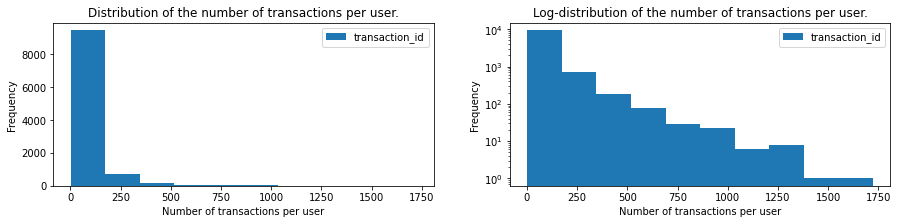

The graphs show that the distribution of the number of transactions per user follows a power-law.


In [7]:
print(f"In average, each user did {n_trans.mean():.2f} transactions. But the median is at {n_trans.median():.2f} transactions.\
\nThe maximum number of transactions is reached with {n_trans.max():,.2f} transactions.")

fig, axes = plt.subplots(1, 2, figsize=(15, 3))

# Plotting distribution
ax = n_trans.to_frame().plot.hist("transaction_id", ax=axes[0])
ax.set_title("Distribution of the number of transactions per user.")
ax.set_xlabel("Number of transactions per user")

# Applying log y-axis.
ax = n_trans.to_frame().plot.hist("transaction_id", ax=axes[1], logy=True)
ax.set_title("Log-distribution of the number of transactions per user.")
ax.set_xlabel("Number of transactions per user")
plt.show()

print("The graphs show that the distribution of the number of transactions per user follows a power-law.")

<span style="color:red">**Discussion**</span>

As mentionned under the graphs, a large majority of the users appear to have done very few transactions (<125). However some users feature a very large number of transactions going up to 1'723 transactions.

The shape of the distribution hints toward a power-law with a significant right-skew. We can verify this by plotting against the log-frequency and observe a linear decrease.
    
However, statistical hypothesis testing should be done to further improve the quality of the analysis.

<span style="color:red">End of discussion</span>

#### c) Which are the 10 most popular event actions? Please provide a visualization of the frequency of the top 10 event actions.

Hint: See actions in table events.

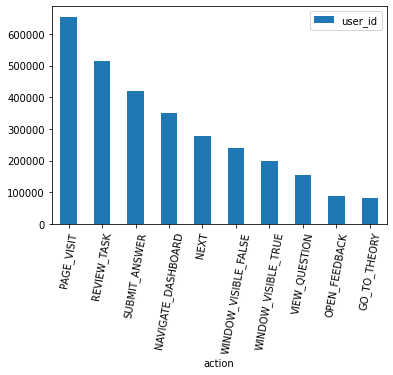

In [8]:
## Answer

# Getting each action's frequency
popular_actions = events.groupby("action").count()["user_id"].to_frame()

# Getting top 10 most frequent actions.
top10actions = popular_actions.nlargest(10, "user_id")

# Plotting
ax = top10actions.reset_index().plot.bar("action", "user_id")
ax.set_xticklabels(top10actions.index.values, rotation=80)
plt.show()

<span style="color:red">**Discussion**</span>

*Note: we consider here that popularity is frequency of an action.*

The top 3 actions are :
- task review (`REVIEW_TASK`),
- answer submission (`SUBMIT_ANSWER`),
- dashboard navigation (`NAVIGATE_DASHBOARD`).

We ignore page visit (`PAGE_VISIT`) as it must be the number of pages accessed on the website (regardless of page content). And thus, we consider that almost any other action increases this count as well.

We consider that **task review** is the reviewing of the input answers before submitting the task. This could mean that the platform is mostly used for evaluation or training rather than learning. This could be supported by the second most popular action **answer submission**.<br>
Moreover, because **visiting the dashboard** is less frequent than **submitting an answer**, we can also suppose that once student choose to work on Mathematics or on German, they never switch to the other topic. Therefore they never go back to the dashboard.<br>

Then we can see that `WINDOW_VISIBLE_FALSE` is more frequent than `WINDOW_VISIBLE_TRUE`. Although, this looks couterintuitive at first, an explanation could be that students are actually checking their answers on the internet (hopefully not while examination) or using the internet to learn rather than the built-in theory modules.

<span style="color:red">End of discussion</span>

## Task 2: Static Analysis

In this second task, you will do a univariate an multivariate exploration of some aggregated features.

#### a) Build a data frame containing one row per user:

``[user_id, gender, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered (hint: action event = submit answer)

- **num_events**: total number of events of the student  

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_reading**: total number of theory reading events  (hint: action event = go to theory)

In [9]:
# Preprocessing data types
print(f"Transactions table user_id type:   {transactions.user_id.dtypes}")
print(f"Events table user_id type:         {events.user_id.dtypes}")   

print(f"There are no decimal parts in any user_id in the transactions table: {transactions.loc[transactions.user_id % 1 != 0].shape[0] == 0}")
print("We cast user_id from transactions into integers.\n")
transactions['user_id'] = transactions.user_id.apply(int)

print(f"Transactions table user_id type:   {transactions.user_id.dtypes}")
print(f"Events table user_id type:         {events.user_id.dtypes}")   

Transactions table user_id type:   float64
Events table user_id type:         int64
There are no decimal parts in any user_id in the transactions table: True
We cast user_id from transactions into integers.

Transactions table user_id type:   int64
Events table user_id type:         int64


In [10]:
def remove_users(events, transactions):
    """
    Removing users that feature transaction tokens in events but not in transactions. 
    cf. https://moodle.epfl.ch/mod/forum/discuss.php?d=73151
    """
    tokens_event = set(events['transaction_token'].unique())
    print(f"{len(tokens_event):,.0f} tokens in events")

    tokens_trans = set(transactions['transaction_token'].unique())
    print(f"{len(tokens_trans):,.0f} tokens in transactions")

    missing_tokens = list(tokens_event - tokens_trans)
    missing_tokens.remove(np.nan)
    print(f"{len(missing_tokens):,.0f} tokens in events but not in transactions")

    users_missing = list(events[events['transaction_token'].isin(missing_tokens)]['user_id'].unique())
    print(f"{len(users_missing):,.0f} users with transactions in events but not in transactions")

    # Events without users with transactions in events table only. Equivalent to removing the missing tokens from events.
    len_events = len(events)
    events = events[~events['user_id'].isin(users_missing)]
    stat_events = (len_events - len(events))/len_events
    print("{}% of events eliminated".format(round(stat_events, 4)))

    return events, transactions

events, transactions = remove_users(events, transactions)

637,678 tokens in events
800,018 tokens in transactions
37,685 tokens in events but not in transactions
1,304 users with transactions in events but not in transactions
0.0595% of events eliminated


In [11]:
## Answer

## Creating the num_questions column
# Isolating only the rows containing the event of submitting an answer
nq = events.loc[events.action == 'SUBMIT_ANSWER', ["user_id", "action"]]
# Counting the number of such events for each user
nq = nq.groupby('user_id').count()
# Preparing user_id column for merging
nq = nq.reset_index()
# Renaming column for final df
nq = nq.rename(columns={"action":"num_questions"})
# Showing first lines of result
display(nq.head(2))

# Creating num_events
ne = events.groupby("user_id")["event_id"].count().reset_index().rename(columns={"event_id":"num_events"})
display(ne.head(2))

# Creating percentage_correct
t = transactions.loc[~transactions.evaluation.isna()].groupby('user_id').count().transaction_id.reset_index()
c = transactions.loc[transactions.evaluation == 'CORRECT'].groupby('user_id').count().transaction_id.reset_index()
pc = transactions.loc[transactions.evaluation == 'PARTIAL'].groupby('user_id').count().transaction_id.reset_index()
pec = t.merge(c.merge(pc, how='outer', on="user_id", suffixes=["_1", "_2"]), how='outer', on="user_id").fillna(0).rename(columns={
    'transaction_id': 'total',
    'transaction_id_1': 'correct',
    'transaction_id_2': 'part_correct'
})
pec["percentage_correct"] = (pec.correct + 0.5*pec.part_correct) / pec.total
pec = pec.loc[:, ["user_id", "percentage_correct"]]
display(pec.head(2))

# Creating num_reading
nr = events.loc[events.action == "GO_TO_THEORY"].groupby("user_id")["event_id"].count().reset_index().rename(columns={
    "event_id":"num_reading"
})
display(nr.head(2))

,user_id,num_questions
0,387604,97
1,387605,217


,user_id,num_events
0,387604,2606
1,387605,3331


,user_id,percentage_correct
0,387604,0.536082
1,387605,0.648039


,user_id,num_reading
0,387604,368
1,387605,33


In [12]:
## Performing some checks

# Checking number of SUBMIT_ANSWER events vs. number of ~nan transactions per user.
tmp1 = t.sort_values('user_id')
tmp2 = nq.sort_values('user_id')

verif0 = (not len(tmp1.user_id.unique()) > len(tmp2.user_id.unique())) and tmp1.user_id.unique() == tmp2.user_id.unique()
if not verif0: 
    print("Some users are tracked in transactions but not in events.")
    print(f"# users in Transactions (with ~NaN answer):     {len(tmp1.user_id.unique())}")
    print(f"# users in Events (with SUBMIT_ANSWER event):   {len(tmp2.user_id.unique())}")
else :
    verif1 = tmp1.shape == tmp2.shape
    if not verif1: print("The number of users with tracked events is not the same when tracking non NaN transactions and SUBMIT_ANSWER events.")
    else :
        verif2 = tmp1.values == tmp2.values
        if not verif2: print("The number of non NaN transactions does not correspond to the number of SUBMIT_ANSWER events.")



Some users are tracked in transactions but not in events.
# users in Transactions (with ~NaN answer):     10217
# users in Events (with SUBMIT_ANSWER event):   7768


<span style='color:red'>**Note**:</span> The tables feature some data inconsistency due to delayed creation of events table. cf. [Forum Thread](https://moodle.epfl.ch/mod/forum/discuss.php?d=73151)

In [13]:
# Building final dataframe
stat = nq.merge(ne, how='outer', on='user_id')
stat = stat.merge(pec, how='outer', on='user_id')
stat = stat.merge(nr, how='outer', on='user_id')
stat = stat.merge(users[['user_id']], how='outer', on='user_id') # accounting for users that would not have done anything

stat.fillna(0, inplace=True)
stat.sample(5)

,user_id,num_questions,num_events,percentage_correct,num_reading
4790,398893,25.0,191.0,0.540000,0.0
13479,403232,0.0,0.0,0.000000,0.0
2418,395040,53.0,701.0,0.650943,4.0
10397,391705,0.0,0.0,0.635135,0.0
264,388414,5.0,72.0,0.866667,0.0


In [14]:
## Optionally adding the num_questions computed from the transactions
nqt = transactions.loc[~transactions.evaluation.isna()].value_counts('user_id').reset_index().rename(columns={0:'num_questions_tr'})
stat_tr = stat.merge(nqt, how="outer", on='user_id').fillna(0)
display(stat_tr.sample(5))

print(f"There are {stat_tr.loc[stat_tr.num_questions_tr.isna()].shape[0]:,.0f} users with unevaluated answers (0 in num_questions_tr).")


,user_id,num_questions,num_events,percentage_correct,num_reading,num_questions_tr
536,389422,48.0,429.0,0.679245,18.0,53.0
9547,389833,0.0,0.0,0.521739,0.0,23.0
9998,390681,0.0,0.0,0.600000,0.0,5.0
9951,390501,0.0,0.0,0.662162,0.0,37.0
12729,398563,0.0,0.0,0.000000,0.0,0.0


There are 0 users with unevaluated answers (0 in num_questions_tr).


b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (gender, num_events, num_questions, percentage_correct, num_reading) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?



-------------------------- num_questions



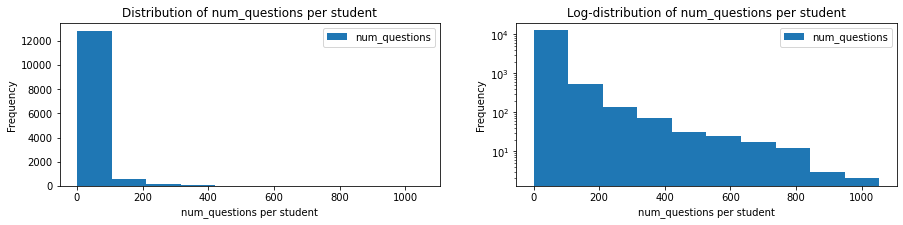

,num_questions
count,13695.000000
mean,28.696386
std,68.375296
min,0.000000
25%,0.000000
50%,5.000000
75%,30.000000
max,1054.000000




DAgostino normality test:                stat=15557.014, p=0.000     Not gaussian
Kolmogorov-Smirnov poisson fit test:     stat=0.635, p=0.000     Not poisson
Kolmogorov-Smirnov exponential fit test: stat=0.504, p=0.000     Not exponential




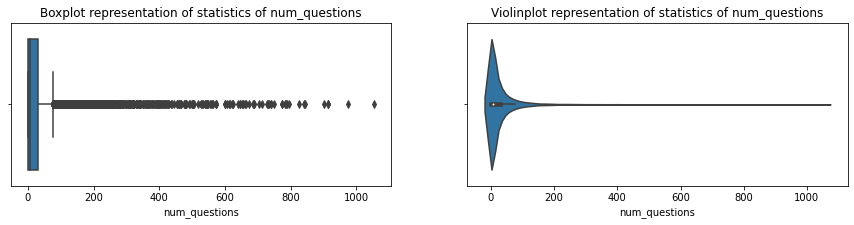



-------------------------- num_events



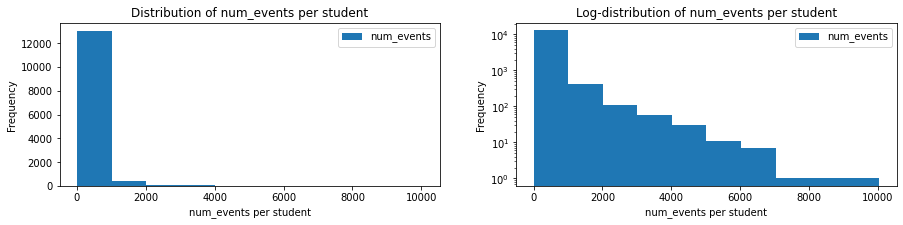

,num_events
count,13695.000000
mean,237.984593
std,520.704837
min,0.000000
25%,0.000000
50%,71.000000
75%,260.000000
max,10044.000000




DAgostino normality test:                stat=15646.913, p=0.000     Not gaussian
Kolmogorov-Smirnov poisson fit test:     stat=0.684, p=0.000     Not poisson
Kolmogorov-Smirnov exponential fit test: stat=0.634, p=0.000     Not exponential




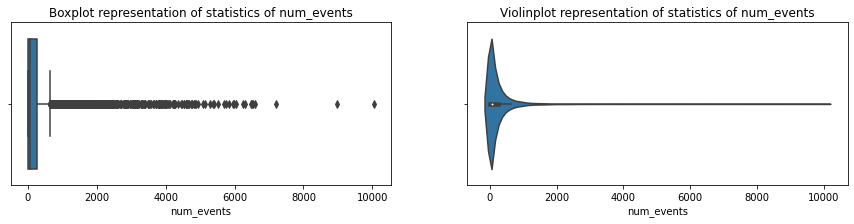



-------------------------- percentage_correct



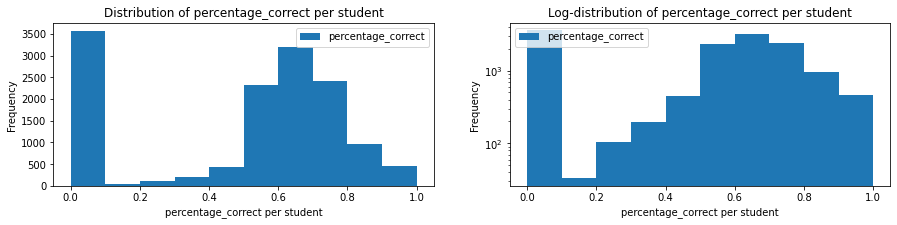

,percentage_correct
count,13695.000000
mean,0.489326
std,0.314302
min,0.000000
25%,0.000000
50%,0.609244
75%,0.714286
max,1.000000




DAgostino normality test:                stat=5172.307, p=0.000     Not gaussian
Kolmogorov-Smirnov poisson fit test:     stat=0.613, p=0.000     Not poisson
Kolmogorov-Smirnov exponential fit test: stat=1.000, p=0.000     Not exponential




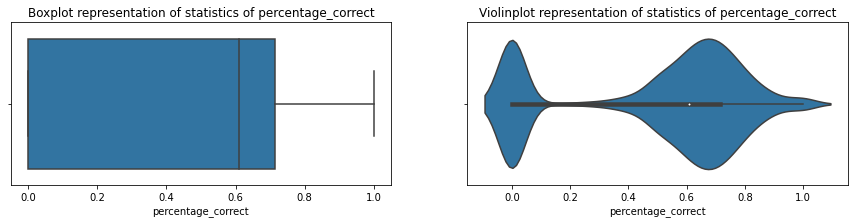



-------------------------- num_reading



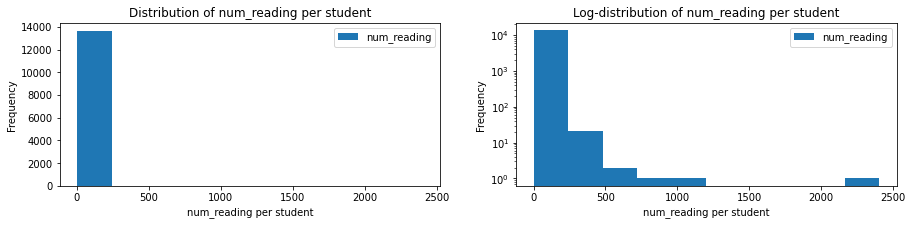

,num_reading
count,13695.000000
mean,5.843666
std,32.239218
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,2404.000000




DAgostino normality test:                stat=38661.700, p=0.000     Not gaussian
Kolmogorov-Smirnov poisson fit test:     stat=0.698, p=0.000     Not poisson
Kolmogorov-Smirnov exponential fit test: stat=0.673, p=0.000     Not exponential




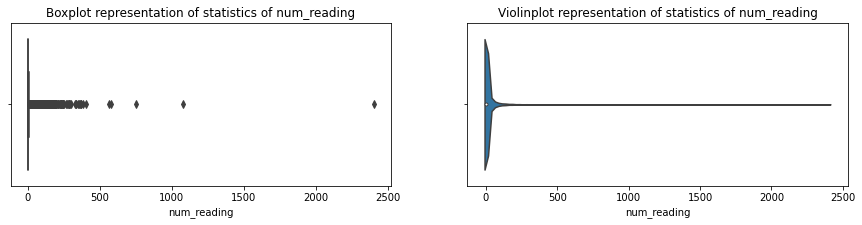

In [15]:
## Answer
import seaborn as sns
import scipy.stats as stats

## Initial visualizations, before hand-picked analyses

def visualize_all(name, stat, label=''):
    if label=='':label=name
    print(f"\n\n-------------------------- {label}\n")

    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    # Show distribution of values
    ax = view.plot.hist(ax=axes[0])
    ax.set_title("Distribution of " + name + " per student")
    ax.set_xlabel(name + " per student")
    # Show log distr
    ax = view.plot.hist(ax=axes[1], logy=True)
    ax.set_title("Log-distribution of " + name + " per student")
    ax.set_xlabel(name + " per student")

    plt.show()

    # Show statistics
    display(view.describe())
    print('\n')
    
    ## Perform tests
    # Remove NaN values and replace by median (robust to outliers)
    tmp = view.fillna(view[name].median())[name].values
    # Normality
    s, p = stats.normaltest(tmp)
    print(f"{'DAgostino normality test:':40} stat={s:.3f}, p={p:,.3f}     {'Not gaussian' if p<0.05 else ''}")
    # Poisson
    s, p = stats.kstest(tmp, 'poisson', args=[np.mean(tmp)], N=len(tmp))
    print(f"{'Kolmogorov-Smirnov poisson fit test:':40} stat={s:.3f}, p={p:,.3f}     {'Not poisson' if p<0.05 else ''}")
    # Poisson
    s, p = stats.kstest(tmp, 'expon', args=[1/np.mean(tmp)], N=len(tmp))
    print(f"{'Kolmogorov-Smirnov exponential fit test:':40} stat={s:.3f}, p={p:,.3f}     {'Not exponential' if p<0.05 else ''}")

    print('\n')
    
    # Visualize values repartition
    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    sns.boxplot(x = name, data=view, ax = axes[0]).set_title(f"Boxplot representation of statistics of {name}")
    sns.violinplot(x = name, data=view, ax = axes[1]).set_title(f"Violinplot representation of statistics of {name}")
    plt.show()

# Loop through all the colums and performs the same set of visualizations and statistical tests.
for name in stat.columns[1:]:
    view = stat[[name]]
    visualize_all(name, view)



-------------------------- num_questions (without 0 values)



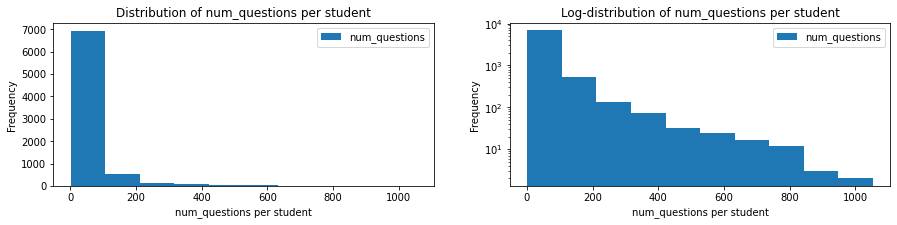

,num_questions
count,7768.000000
mean,50.591787
std,84.468592
min,1.000000
25%,11.000000
50%,25.000000
75%,55.000000
max,1054.000000




DAgostino normality test:                stat=7561.921, p=0.000     Not gaussian
Kolmogorov-Smirnov poisson fit test:     stat=0.613, p=0.000     Not poisson
Kolmogorov-Smirnov exponential fit test: stat=0.904, p=0.000     Not exponential




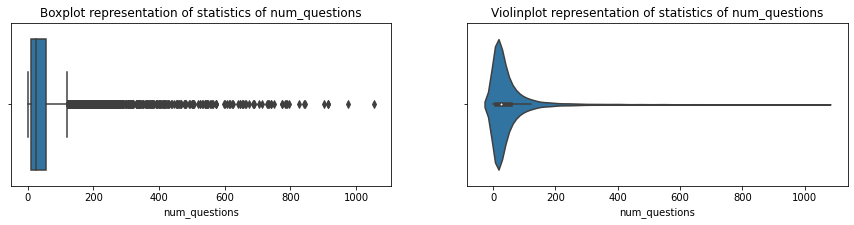



-------------------------- num_events (without 0 values)



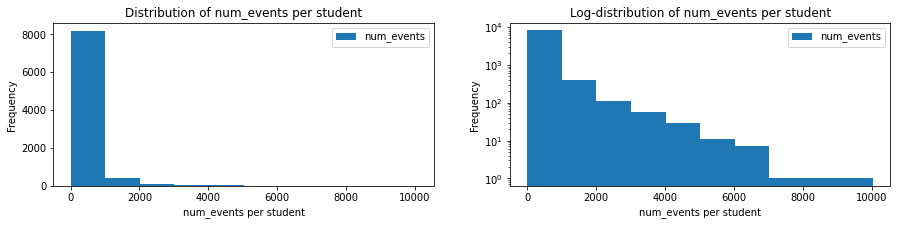

,num_events
count,8809.000000
mean,369.985129
std,610.486482
min,1.000000
25%,82.000000
50%,190.000000
75%,406.000000
max,10044.000000




DAgostino normality test:                stat=9053.251, p=0.000     Not gaussian
Kolmogorov-Smirnov poisson fit test:     stat=0.678, p=0.000     Not poisson
Kolmogorov-Smirnov exponential fit test: stat=0.988, p=0.000     Not exponential




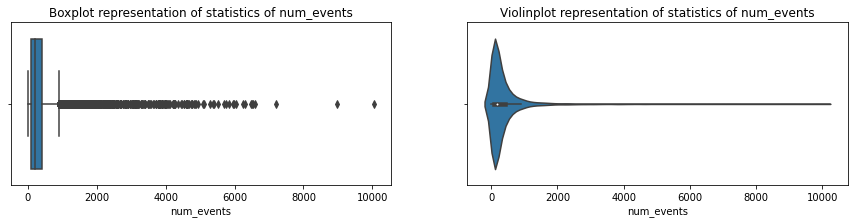



-------------------------- percentage_correct (without 0 values)



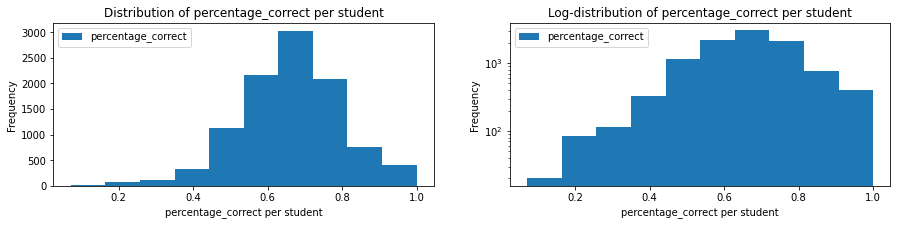

,percentage_correct
count,10123.000000
mean,0.661989
std,0.139047
min,0.071429
25%,0.580904
50%,0.666667
75%,0.750000
max,1.000000




DAgostino normality test:                stat=272.866, p=0.000     Not gaussian
Kolmogorov-Smirnov poisson fit test:     stat=0.516, p=0.000     Not poisson
Kolmogorov-Smirnov exponential fit test: stat=1.000, p=0.000     Not exponential




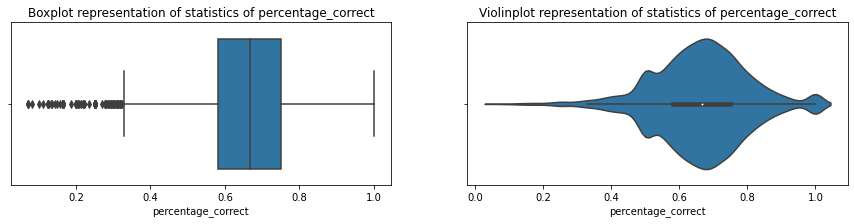

--------------------------  percentage_correct (0 values subset)



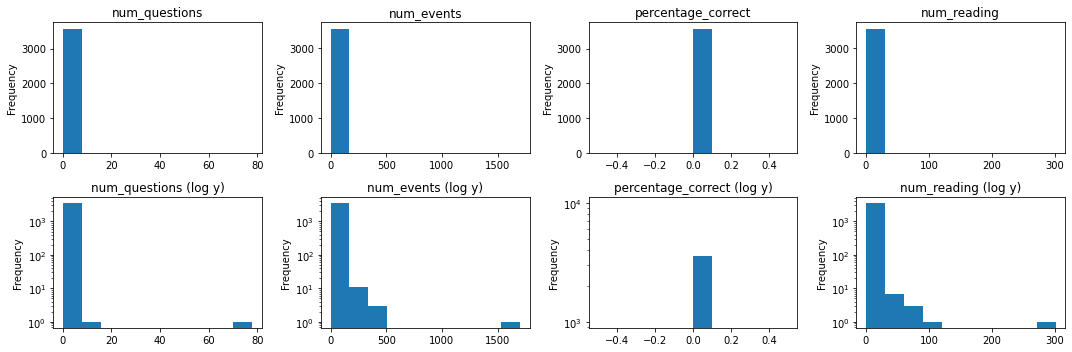

--------------------------  Distribution similarity (num_questions vs num_events)

Using KS distribution similarity test, we obtain : stat=0.39700620664476083, p-value=0.0.
This leads to saying that we reject the null hypothesis (same distribution).

--------------------------  Correlation of O values among features



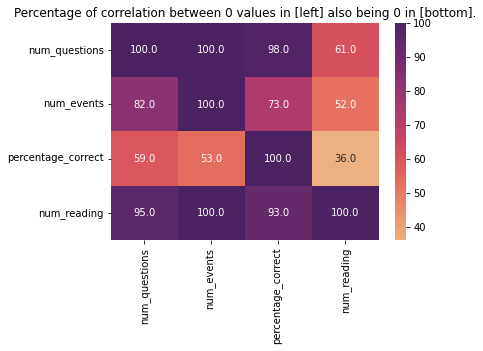

In [124]:
## Hand-picked tests after initial exploration

# num_questions without 0 values
name = 'num_questions'
view = stat.loc[stat[name] != 0, name].to_frame()
visualize_all(name, view, label=name+' (without 0 values)')

# num_events without 0 values
name = 'num_events'
view = stat.loc[stat[name] != 0, name].to_frame()
visualize_all(name, view, label=name+' (without 0 values)')

# percentage_correct without 0 values
name = 'percentage_correct'
view = stat.loc[stat[name] != 0, name].to_frame()
visualize_all(name, view, label=name+' (without 0 values)')

# percentage_correct with 0%, distribution of all features for this subset
name = 'percentage_correct'
print("-------------------------- ", name, '(0 values subset)\n')
view = stat.loc[stat[name] == 0]

f, a = plt.subplots(2, 4, figsize=(15, 5))
for i, col in zip(range(len(a[0])), view.columns[1:]):
    ax = view[col].plot.hist(ax=a[0][i])
    ax.set_title(col)
    ax = view[col].plot.hist(ax=a[1][i], logy=True)
    ax.set_title(col + ' (log y)')
plt.tight_layout()
plt.show()

# Testing similarity of distribution between num_questions and num_events
s, p = stats.kstest(stat.num_events.tolist(), stat.num_questions.tolist())
print("--------------------------  Distribution similarity (num_questions vs num_events)\n")
print(f"Using KS distribution similarity test, we obtain : stat={s}, p-value={p}.")
print(f"This leads to saying that we {'cannot ' if p > 0.05 else ''}reject the null hypothesis (same distribution).")


# Testing the correlation of 0 values among features
print("\n--------------------------  Correlation of O values among features\n")
t = []
columns = stat.columns[1:]
for c in columns:
    r = []
    for o in columns:
        if o == r: r.append(1)
        else:
            val0corr = stat.loc[(stat[c]==0) & (stat[o]==0)].shape[0]
            val0 = stat.loc[stat[o]==0].shape[0]
            ratio = (val0corr*100/val0)//1
            r.append(ratio)
    t.append(r)
    
ax = sns.heatmap(t, annot=True, xticklabels=columns, yticklabels=columns, fmt=".1f", cmap='flare')
ax.set_title("Percentage of correlation between 0 values in [left] also being 0 in [bottom].")
plt.show()

<span style="color:red">**Discussion**</span>

- `num_questions`: min and 25% are **0**, implying a significant amount of 0 values (no questions answered). These could be considered as outliers. Indeed, the boxplot labels all values above **~80** as outliers due to the overwhelming amount of 0 values. After removal of 0 values, we still observe a min of **1**, 25% quartile of **11** and median of **25**. All values above **~110** are still treated as outliers (with max at **1'054**). So we still have a strong right-skewness.

- `num_events`: similarly to previous column, min and 25% are **0**, with values >**~600** considered as outliers. We try to plot without 0 values. After removal, we observe a min of **1**, 25% of **82** and median of **190**. All values above **~800** are treated as outliers (with max at **10'044**). Therefore, there is a strong right-skewness here as well.

- `percentage_correct`: Graphically, we see a spike at **0** in the distribution, followed by what could be a gaussian truncated at **1** (100%). It would be interesting to see the distribution of other columns for the population that has 0% (first spike). Moreover, we can try to consider these values as outsiders (i.e. remove them) and compare the resulting distribution to a gaussian. After removal, the distribution ressembles a lot a gaussian distribution. **Note:** the 0 value subset features also a very large majority of 0 values in the other categories. Therefore we can treat them as outliers.

- `num_readings`: min, 25% and 50% quartiles are all **0**. But the maximum of **2'404** brings the average to **5.843666**. This indicates a very strong skewness, also visible graphically in the distribution. A tiny subset of 10 students seem to have values around the maximum. But this subset is so much an outlier that we can suppose that it is the professors who have gone through, maybe created, the readings. In the overall, this feature can be discarded as it does not bring enough information about the population. We conclude by observing that the platform is not used to learn.

All the counting measures (`num_events`, `num_questions`) seem to feature a **power-law** (log-normal distribution). This hints towards a usual usage of the platform.

Moreover, these **two distributions** look very **similar** even thought a KS test rejects the hypothesis that they are the same.

Then the **percentage of correct answers** visually hints towards a gaussian distribution. Here again a D'Agostino test rejects the null hypothesis (gaussian distribution).

Finally the distribution of the **number of theory consultations** is **extremely skewed**. This supports that the service is not very used for learning but rather for evaluation or exercises. 

In the overall, **deleting 0 values** does not affect the data distributions. Plus, 0 values seem to **correlate** in `num_events` and `num_questions` with 0 values in the other features. Therefore, by removing the 0 values entries in these, we further clean our dataset. Additionally, let us note that in the analysis of the data, we chose to **replace** `NaN` by 0 values. This tells us that the smaller fraction of 0 values that is not 0 among all features may be actual data. But it is too small to be relevant. Another approach should do the same analysis and remove the `NaN` instead of replacing them by 0.

<span style="color:red">**End of discussion**</span>

c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

In [16]:
### FEATURE 1: Compute question type with biggest success ratio for each student

# isolate only identified type transactions
tmp = transactions.loc[~transactions.type.isna()]

# Compute total number of and number of correct transactions by type
total = tmp.groupby(['user_id', 'type']).count().transaction_id
correct = tmp.loc[transactions.evaluation == 'CORRECT'].groupby(['user_id', 'type']).count().transaction_id

# display(total.describe())
print(f"""
We observe that the distribution is volatile with a std of {total.std():.2f} and a average of {total.mean():.2f}.
This means that the number of answered questions varies a lot across students.
We choose to compute the average number of encountered question type for each student. 
Then we keep for each student only the types that have a count above this average.
""")

## Keeping only the transaction types that have been seen more than the average per student, for each student.

# Get average number of transactions per type, per student
m = total.reset_index().groupby('user_id').mean()
# Aggregate all info in one table
total = total.reset_index().merge(correct.reset_index(), on=['user_id', 'type'], suffixes=['_total', '_correct'])
total = total.merge(m.reset_index(), on='user_id') 
total.rename(columns={'transaction_id_total':'total', 'transaction_id_correct':'correct', 'transaction_id':'average'}, inplace=True)
# Keeping only the types where the encountered count is larger than the average encounter count for each student
total = total.where(total.total >= total.average)
total = total.loc[~total.user_id.isna()]
# Computing success ratio per type per student
total['ratio'] = total.correct / total.total

# Sorting all types per success ratio for each student
a = total
a['success_score'] = a[['type', 'ratio']].agg(tuple, axis=1)
a = a.groupby('user_id')['success_score'].agg(list)
scores = a.apply(lambda r : sorted(r, key= lambda x:x[1])).to_frame()
display(scores)


We observe that the distribution is volatile with a std of 14.58 and a average of 8.19.
This means that the number of answered questions varies a lot across students.
We choose to compute the average number of encountered question type for each student. 
Then we keep for each student only the types that have a count above this average.



,success_score
user_id,
387604.0,"[(CLOZE_TEXT, 0.09090909090909091), (CLOZE_TEX..."
387605.0,"[(OPEN_TASK, 0.45454545454545453), (CLOZE_MATH..."
387608.0,"[(MATH_STEP_BY_STEP, 0.7058823529411765), (SOL..."
387615.0,"[(CLOZE_TEXT, 0.4), (CLOZE_TEXT_DROPDOWN, 0.48..."
387643.0,"[(MULTIPLE_CHOICE, 0.375)]"
...,...
404592.0,"[(MULTIPLE_CHOICE, 0.4666666666666667)]"
404593.0,"[(MULTIPLE_CHOICE, 0.46153846153846156)]"
404598.0,"[(CLOZE_TEXT, 1.0)]"


In [17]:
## FEATURE 2: compute the average time spent on each question

from datetime import datetime

tmp = transactions.loc[:, ['user_id']]
tmp['end'] = pd.to_datetime(transactions.commit_time, unit='ms')
tmp['start'] = pd.to_datetime(transactions.start_time, unit='ms')
tmp['duration'] = tmp.end - tmp.start
tmp['seconds_duration'] = tmp.duration.apply(lambda x: x.total_seconds())


# display(tmp.describe())
print(f"""
With a std of {tmp.duration.std()} and a median of {tmp.duration.median()}, we can safely consider that \
very large outliers will impact the mean. Therefore, we should take the median amount of time spent for each student.
""")

duration = tmp.groupby('user_id')[['duration', 'seconds_duration']].median()
display(duration)


With a std of 4 days 01:22:14.539241703 and a median of 0 days 00:00:36.777000064, we can safely consider that very large outliers will impact the mean. Therefore, we should take the median amount of time spent for each student.



,seconds_duration
user_id,
387604,12.849999
387605,20.517500
387608,29.340000
387615,14.919999
387643,60.217000
...,...
404597,53.749000
404598,65.381000
404599,79.601000


In [355]:
s = stat.merge(scores.reset_index(), on='user_id', how='outer')
s = s.merge(duration.reset_index(), on='user_id', how='outer')

stat = s
stat.head()

,user_id,num_questions,num_events,percentage_correct,num_reading,success_score,seconds_duration
0,387604,97.0,2606.0,0.536082,368.0,"[(CLOZE_TEXT, 0.09090909090909091), (CLOZE_TEX...",12.849999
1,387605,217.0,3331.0,0.648039,33.0,"[(OPEN_TASK, 0.45454545454545453), (CLOZE_MATH...",20.517500
2,387608,54.0,866.0,0.821192,23.0,"[(MATH_STEP_BY_STEP, 0.7058823529411765), (SOL...",29.340000
3,387615,15.0,492.0,0.720721,10.0,"[(CLOZE_TEXT, 0.4), (CLOZE_TEXT_DROPDOWN, 0.48...",14.919999
4,387644,30.0,760.0,0.796875,99.0,"[(CLOZE_TEXT, 0.4), (MULTIPLE_CHOICE, 0.777777...",45.794000


<span style='color:red'>**Discussion**</span>

**Feature 1**<br>
The chosen feature should teach something about each student. Ideally, we would focus on the student's success using this platform.<br>
Therefore, it is interesting to explore which type of question suits the students most, and to which extent.<br>
This is also a good indication about the format popularity of the questions themselves, their ease of use and their contribution to the success of the students overall.

The added feature therefore computes the **ranked list of question types** with their respective **success ratio**.<br>

**Feature 2**<br>
Similarly, in order to learn more about the student themselves, it is relevant to see how much time they take to get to their result.<br>
Thus, we compute the difference between the end and start time. Then, after observing the presence of large outliers, we use the median as unique (but robust) metric reflecting the average student's **time to completion**.

*Note:* After observing a significant amount of transactions featuring a start time but no commit time, we conclude that another interesting feature would be the number of abandons per student (with an abandon being a transaction in which there was no end time).

<span style='color:red'>End of discussion</span>

d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

,popularity
count,18.000000
mean,523.000000
std,751.901746
min,3.000000
25%,54.250000
50%,228.500000
75%,583.750000
max,2519.000000


,effectiveness
count,18.000000
mean,0.476139
std,0.155366
min,0.198739
25%,0.372894
50%,0.485462
75%,0.571272
max,0.750000


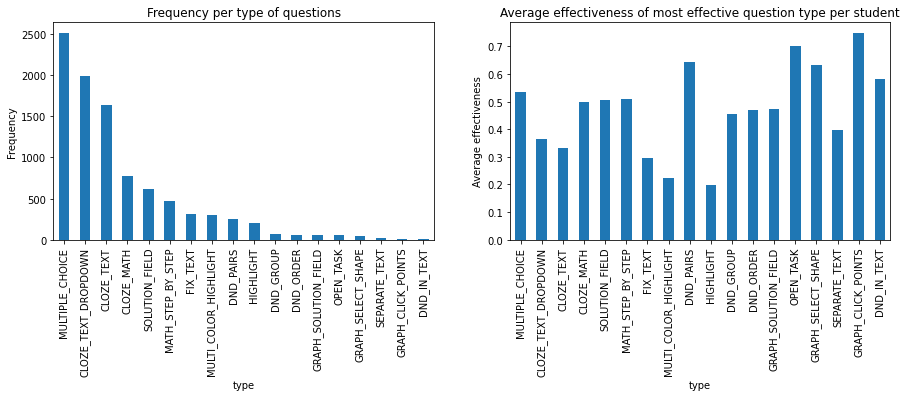

In [22]:
## Answer
## Analysis feature 1
tmp = scores.success_score.apply(lambda x : x[0]).to_frame()
tmp['type'] = tmp.success_score.apply(lambda x : x[0])
tmp['ratio'] = tmp.success_score.apply(lambda x : x[1])

popularity = tmp.value_counts('type').sort_values(ascending=False)
effectiveness = tmp.groupby('type').mean().ratio.loc[popularity.index]

display(popularity.to_frame().rename(columns={0:'popularity'}).describe())
display(effectiveness.to_frame().rename(columns={'ratio':'effectiveness'}).describe())

f, a = plt.subplots(1, 2, figsize=(15, 4))
ax = popularity.plot.bar(ax=a[0])
ax.set_ylabel('Frequency')
ax.set_title('Frequency per type of questions')
ax = effectiveness.plot.bar(ax=a[1])
ax.set_ylabel('Average effectiveness')
ax.set_title('Average effectiveness of most effective question type per student')
plt.show()

<span style='color:red'>**Discussion**</span>

We can observe that the popularity of question types clearly distinguishes the 3 most popular types as :
- `MULTIPLE_CHOICE`,
- `CLOZE_TEXT_DROPDOWN`,
- `CLOZE_TEXT`

With a difference of ~700 to the 4th most popular type (significant as the most popular type has a score of ~2500).<br>

However (and rather surprisingly), there does not seem to be any correlation between the popularity and the efficiency of a test to make a student succeed. We can observe in the average success ratios that the 3 most popular types are not the 3 types with the highest success ratio.

Further analysis can be done on the populations that went through each type in order to try to understand the variations.

<span style='color:red'>End of discussion</span>

,seconds_duration
count,1.028200e+04
mean,1.952860e+03
std,7.328397e+04
min,8.120000e-01
25%,2.928025e+01
50%,4.400725e+01
75%,6.798238e+01
max,4.589248e+06


,hourly
count,10269.000000
mean,57.143169
std,68.525798
min,0.812000
25%,29.269999
50%,43.968999
75%,67.848500
max,3183.795000


,deciminute
count,10252.000000
mean,55.349901
std,44.869665
min,0.812000
25%,29.253124
50%,43.892249
75%,67.557125
max,566.840499


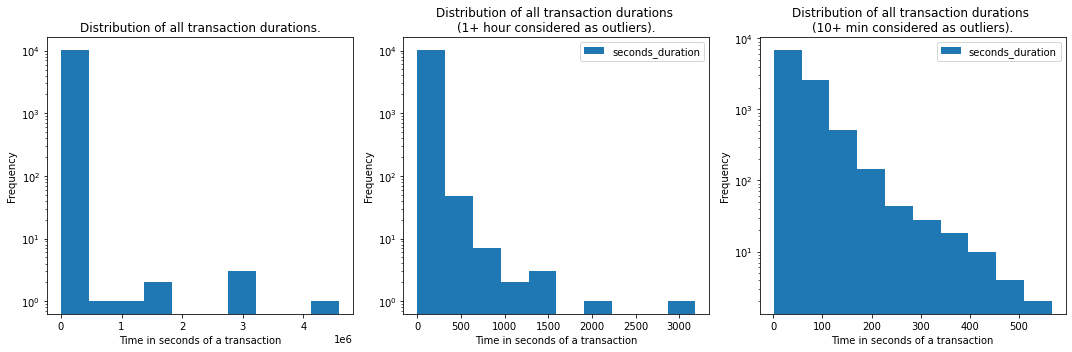

In [24]:
## Analysis feature 1

f, a = plt.subplots(1, 3, figsize=(15, 5))

hourly = duration.loc[duration.seconds_duration < 60*60]
deciminute = duration.loc[duration.seconds_duration < 60*10]

display(duration[['seconds_duration']].describe())
display(hourly.rename(columns={'seconds_duration':'hourly'}).describe())
display(deciminute.rename(columns={'seconds_duration':'deciminute'}).describe())

ax = duration.seconds_duration.plot.hist(logy=True, ax=a[0])
ax.set_title('Distribution of all transaction durations.')
ax.set_xlabel('Time in seconds of a transaction')
ax = hourly.plot.hist(logy=True, ax=a[1])
ax.set_title('Distribution of all transaction durations \n(1+ hour considered as outliers).')
ax.set_xlabel('Time in seconds of a transaction')
ax = deciminute.plot.hist(logy=True, ax=a[2])
ax.set_title('Distribution of all transaction durations \n(10+ min considered as outliers).')
ax.set_xlabel('Time in seconds of a transaction')
plt.tight_layout()
plt.show()

<span style='color:red'>**Discussion**</span>

The distribution of median time spent on a question looks at first like a very **right-skewed** (if not unidentifiable) distribution. We see a major spike in time for the very small values, followed, by 3 small spikes located at various times. 

It would be interesting to explore each spike's population in more details in order to try to **identify** the type of subject that fall in each category (e.g. checking their correlation with the `WINDOW_VISIBLE_FALSE` event in order to check if they were not simply doing something else).

However, when we discard the students with a median time higher that 10 minutes, we start observing a more **linear distribution**. This could be evidence that the discarded times are not relevant and should be considered as outliers, because the cropped data looks distributed in a more natural way.

<span style='color:red'>End of discussion</span>

e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

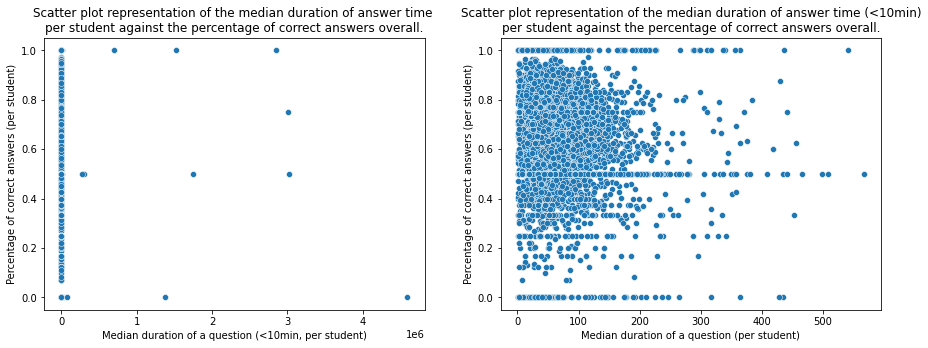

In [36]:
## Answer

# Taking the 10 minutes duration time range
deciminute = duration.loc[duration.seconds_duration < 60*10]
# Isolating the percentage_correct feature
multi = deciminute.reset_index().merge(stat[['user_id', 'percentage_correct']], on='user_id', how='left')
all_duration = duration.reset_index().merge(stat[['user_id', 'percentage_correct']], on='user_id', how='left')

fig, a = plt.subplots(1, 2, figsize=(15, 5))

ax = sns.scatterplot(x='seconds_duration', y='percentage_correct', data=all_duration, ax=a[0])
ax.set_title("""Scatter plot representation of the median duration of answer time 
per student against the percentage of correct answers overall.""")
ax.set_xlabel("Median duration of a question (<10min, per student)")
ax.set_ylabel("Percentage of correct answers (per student)")

ax = sns.scatterplot(x='seconds_duration', y='percentage_correct', data=multi, ax=a[1])
ax.set_title("""Scatter plot representation of the median duration of answer time (<10min)
per student against the percentage of correct answers overall.""")
ax.set_xlabel("Median duration of a question (per student)")
ax.set_ylabel("Percentage of correct answers (per student)")
plt.show()

<span style='color:red'>**Discussion**</span>

Our original idea is to explore the data looking for a visual correlation between the time spent on a question (`seconds_duration`) and the success rate (`percentage_correct`).

However, upon visualizing the data, there does not seem to be any correlation between the success of a question and the time spent on it. An information that could be derived from the graph though, is that there seems to be a number of students that are either **always correct** (100% correct), or **always wrong** (0% correct). These students could be students that have answered a very small number of questions and thus do not feature enough data to be statistically significant. A solution could be to identify and remove them from our dataset.

Trying to identify good students by looking at how fast they are definitely does not seem like a path to explore !! 

<span style='color:red'>End of Discussion</span>

# Task 3: Time-Series Analysis

In the last task, you will perform a time-series analysis.


#### a) Build a data frame containing one row per user per week:

``[user_id, week, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered **per week**(hint: action event = submit answer).

- **num_events**: total number of events of the student per week.

- **percentage_correct**: number of correct answers/total number of answers  **per week** (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers.

- **num_reading**: total number of theory reading events **per week** (hint: action event = go to theory).

Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the transactions table.

Hint: You may extract the week of the year (dt.week) from the timestamps. 

You can limit the number of weeks to 13, i.e. for each user we just look at the first 13 weeks of data.
Yoy may change and justify your choice for the number of weeks.

In [37]:
## Answer

# Build events table with week number
tmp = events.loc[:, ['event_id', 'timestamp']]
tmp['date'] = pd.to_datetime(tmp.timestamp, unit='ms')
tmp['week'] = tmp.date.apply(lambda d:d.week)
tmp = tmp.merge(events, on=['event_id', 'timestamp'])
tmp['week'] = (tmp.week - tmp.iloc[0].week) % 52
display(tmp.head())

# Build transactions table with week number
transac_tmp = transactions[['transaction_token', 'user_id', 'evaluation']]
events_tmp = tmp[['transaction_token', 'week']]
tmp2 = transac_tmp.merge(events_tmp, on='transaction_token', how='right')
display(tmp2.head())

,event_id,timestamp,date,week,user_id,category,action,event_type,transaction_token,session_id,tracking_data
0,69,1621584325174,2021-05-21 08:05:25.174,0,392476,TASK,VIEW_QUESTION,VIEW,46a3af7d-4451-4e1e-ada8-edf9a6d0c3b7,33768.0,NaN
1,70,1621584365975,2021-05-21 08:06:05.975,0,392476,TASK,VIEW_QUESTION,VIEW,46a3af7d-4451-4e1e-ada8-edf9a6d0c3b7,33768.0,NaN
2,72,1621584441478,2021-05-21 08:07:21.478,0,392476,TASK,VIEW_QUESTION,VIEW,46a3af7d-4451-4e1e-ada8-edf9a6d0c3b7,33768.0,NaN
3,73,1621584446771,2021-05-21 08:07:26.771,0,392476,TASK,GO_TO_THEORY,CLICK,46a3af7d-4451-4e1e-ada8-edf9a6d0c3b7,33768.0,NaN
4,223,1621589245107,2021-05-21 09:27:25.107,0,393213,TASK,VIEW_QUESTION,VIEW,54aaee3c-cad7-45da-a436-61fa51cedea3,34343.0,NaN


,transaction_token,user_id,evaluation,week
0,46a3af7d-4451-4e1e-ada8-edf9a6d0c3b7,392476.0,NaN,0
1,46a3af7d-4451-4e1e-ada8-edf9a6d0c3b7,392476.0,NaN,0
2,46a3af7d-4451-4e1e-ada8-edf9a6d0c3b7,392476.0,NaN,0
3,46a3af7d-4451-4e1e-ada8-edf9a6d0c3b7,392476.0,NaN,0
4,54aaee3c-cad7-45da-a436-61fa51cedea3,393213.0,NaN,0


In [38]:
## Building num_question
nqw = tmp.loc[tmp.action == 'SUBMIT_ANSWER'].groupby(['week', 'user_id'])[['action']].count().reset_index()
nqw.rename(columns={'action':'num_questions'}, inplace=True)
display(nqw.head())

## Building num_events
tnw = tmp.groupby(['week', 'user_id'])[['action']].count().reset_index()
tnw.rename(columns={'action':'num_events'}, inplace=True)
display(tnw.head())

## Building percentage_correct
tw = tmp2.loc[~tmp2.evaluation.isna()].groupby(['week', 'user_id']).count().transaction_token.reset_index()
cw = tmp2.loc[tmp2.evaluation == 'CORRECT'].groupby(['week', 'user_id']).count().transaction_token.reset_index()
pcw = tmp2.loc[tmp2.evaluation == 'PARTIAL'].groupby(['week', 'user_id']).count().transaction_token.reset_index()

pecw = tw.merge(cw.merge(pcw, how='outer', on=["week", "user_id"], suffixes=["_1", "_2"]), how='outer', on=["week", "user_id"]).fillna(0).rename(columns={
    'transaction_token': 'total',
    'transaction_token_1': 'correct',
    'transaction_token_2': 'part_correct'
})

pecw["percentage_correct"] = (pecw.correct + 0.5*pecw.part_correct) / pecw.total
pecw = pecw[["week", "user_id", "percentage_correct"]]
display(pecw.head(2))

# Creating num_reading
nrw = tmp.loc[tmp.action == "GO_TO_THEORY"].groupby(["week", "user_id"])["action"].count().reset_index().rename(columns={
    "action":"num_reading"
})
display(nrw.head(2))

,week,user_id,num_questions
0,0,387868,9
1,0,388032,26
2,0,388363,20
3,0,388487,25
4,0,388602,10


,week,user_id,num_events
0,0,387604,1
1,0,387868,30
2,0,388032,92
3,0,388047,2
4,0,388363,79


,week,user_id,percentage_correct
0,0,387868.0,0.300000
1,0,388032.0,0.321429


,week,user_id,num_reading
0,0,392476,1
1,0,393224,1


In [46]:
# Building final dataframe
statw = nqw.merge(tnw, how='outer', on=["week", 'user_id'])
statw = statw.merge(pecw, how='outer', on=["week", 'user_id'])
statw = statw.merge(nrw, how='outer', on=["week", 'user_id']).sort_values(['week', 'user_id'])

statw.fillna(0, inplace=True)
statw.head(5)

,week,user_id,num_questions,num_events,percentage_correct,num_reading
18508,0,387604,0.0,1,0.000000,0.0
0,0,387868,9.0,30,0.300000,0.0
1,0,388032,26.0,92,0.321429,0.0
18509,0,388047,0.0,2,0.000000,0.0
2,0,388363,20.0,79,0.911290,0.0


In [47]:
## Checks to verify that all users have data for each week
from itertools import product

# Creating all pairs of user_id and week number
u = users.user_id.unique().tolist()
w = tmp.week.unique().tolist()
uw = pd.DataFrame(product(u, w), columns=['user_id', 'week'])

# Filling the gaps for users that do not have any data in any week 
statw = statw.merge(uw, on=['week', 'user_id'], how='outer').fillna(0).sort_values(['week', 'user_id'])

print(f'All users have an entry for each week: {uw.shape[0] == statw.shape[0]}')
display(statw.head())

All users have an entry for each week: True


,week,user_id,num_questions,num_events,percentage_correct,num_reading
0,0,387604,0.0,1.0,0.0,0.0
24983,0,387605,0.0,0.0,0.0,0.0
25001,0,387608,0.0,0.0,0.0,0.0
25022,0,387615,0.0,0.0,0.0,0.0
25057,0,387643,0.0,0.0,0.0,0.0


#### b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

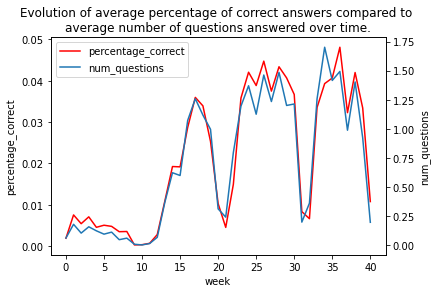

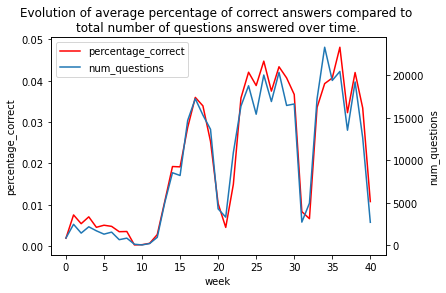

In [53]:
## Answer

# Computing mean values per week
mw = statw.groupby('week').mean().reset_index()
# Summing all values per week
sw = statw.groupby('week').sum().reset_index()


def plot_2_ts(df, f1, f2, df2=None, title=''):
    # If no second df given, uses the data of the first one twice
    if df2 is None: df2 = df
    # Plot 1st feature
    ax = sns.lineplot(data=df, x='week', y=f1, color='red')
    # Use same x axis but different y axis
    ax2 = ax.twinx()
    # Plot 2nd feature
    ax2 = sns.lineplot(data=df2, x='week', y=f2, ax=ax2)
    ax.legend(handles=[ax.lines[0], ax2.lines[0]], labels=[f1, f2])
    ax.set_title(title)
    
    plt.show()
    
t1 = 'Evolution of average percentage of correct answers compared to \naverage number of questions answered over time.'
plot_2_ts(mw, 'percentage_correct', 'num_questions', title=t1)
t2 = 'Evolution of average percentage of correct answers compared to \ntotal number of questions answered over time.'
plot_2_ts(mw, 'percentage_correct', 'num_questions', df2=sw, title=t2)

<span style='color:red'>**Discussion**</span>

We choose to explore the possibility of correlation between the number of answered questions and the percentage of correct answers across time. <br>
The hypothesis is that when more questions are answered by everyone, the percentage of correct answers goes up accordingly. A possible explanation for this is that more training leads to more success. 

After having plotted the success rate (`percentage_correct`) against both the mean and the sum of answered questions, we observe a strong correlation between both of them. This hints toward a real relationship between these two variables. Further exploration is needed in order to check if this correlation is true among all subgroups.<br>
Moreover, the curves feature 3 spikes culminating at the 16th, 24-27th and 35th weeks. 
- 19th week corresponds to september.
- 24-27th weeks correspond to november.
- 35th week corresponds to january.

A first guess is that these periods precede exam dates for the students using the patform.

Finally, the larger objective could be to try to understand what routines the students adopt during the activity spikes, in order to obtain even better results. 

<span style='color:red'>End of Discussion</span>

In [69]:
# Plot week number / month correspondance
tmp3 = tmp.groupby('week').first().reset_index()[['week', 'date']]
tmp3['date'] = tmp3.date.apply(lambda x:x.month)
tmp3

,week,date
0,0,5
1,1,5
2,2,5
3,3,6
4,4,6
5,5,6
6,6,6
7,7,7
8,8,7
9,9,7


# Task 4: Creative extension 

Please provide **one** new hypothesis you would like to explore with the data and visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses? 



In [122]:
## Answer

# Identifying the device name in the user_agent feature
f = lambda x : x[1] + x[2] if (type(x) == list) and (len(x) >= 3) and (type(x[0])==str) else 'unknown'
devices = transactions.user_agent.str.split(r'[(;)]').apply(f)

# Identifying the phones among all devices
phone_tags = ['phone', 'android', 'ipad']
phones = devices.str.lower().str.contains('|'.join(phone_tags)).rename('is_phone')
phones = pd.concat([phones, devices], axis=1)

# Creating a table with the phone and device information
tr_devices = transactions.reset_index().merge(phones.reset_index(), on='index')
tr_devices.head(3)

,index,transaction_id,transaction_token,user_id,document_id,document_version,evaluation,input,start_time,commit_time,user_agent_x,validation,solution,type,is_phone,user_agent_y
0,0,1061991,cf99b0d7-279a-4ae0-8ef3-a15514e350b6,387604,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637146446763,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN,False,Windows NT 10.0 Win64
1,1,1066631,13e3086b-1c4e-4d28-87a3-0582ccf495c6,387604,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637233737283,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN,False,Windows NT 10.0 Win64
2,2,1011975,6f292166-86bd-4ec9-81e8-22e9033d571e,387604,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636444658255,1.636445e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE,False,unknown


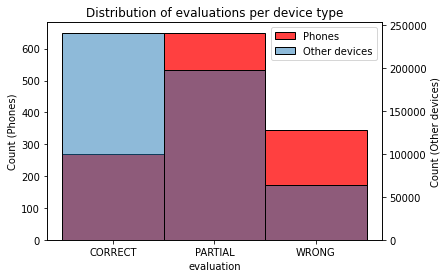

In [123]:
## Visualizing the phone information 

# Keeping only the relevant information
tr_devices = tr_devices[['transaction_id', 'user_id', 'evaluation', 'is_phone', 'user_agent_y']]

# Plotting the phones
ax = sns.histplot(data=tr_devices.loc[tr_devices.is_phone == True], x='evaluation', color='red')
ax.set_ylabel('Count (Phones)')
# Plotting the other devices
ax2 = ax.twinx()
ax2 = sns.histplot(data=tr_devices.loc[tr_devices.is_phone == False], x='evaluation', ax=ax2, alpha=0.5)
ax2.set_ylabel('Count (Other devices)')
# Adding legend to distinguish both of them
ax.legend(handles=[ax.containers[0], ax2.containers[0]], labels=["Phones", "Other devices"])
ax.set_title("Distribution of evaluations per device type")
plt.show()

<span style='color:red'>**Discussion**</span>

Always focused on the success of our students, we try to see what type of device the population uses to access the website, using the `user_agent` feature.

For an initial exploration, we segment the population of devices between **phones** and **other devices**. Then we plot their success according to the result of the `evaluation` feature. <br>
**Note** Empirically, we identify the phones as devices which contain one of `['phone', 'android', 'ipad']`.

There we observe that users on **other devices** have a far bigger rate of `CORRECT` evaluations (relative to the amounts of `PARTIAL` and `WRONG`) than those accessing the website through phones.
Of course this makes sense, as the laptop medium also means that the student is set somewhere to work and not on the move. Also, the phones feature smaller screens and thus make is harder to work correctly.

Finally, a full analysis should dive into the actions of the users according to their device type. A finer granularity could be applied to segment the device population, and one should explore the `action`, duration and `evaluation` of each subpopulation.

<span style='color:red'>End of Discussion</span>